# Seattle AirBnb Listings Dataset : Predict the Prices of AirBnb Listings

In [1]:
#Importing Packages

import pandas as pd
import numpy as np
from math import sqrt  # For squareroot operation
from time import time

#Ploting
import matplotlib.pyplot as plt
import seaborn as sns

#NLP
import string
import re 
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Model Selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation

#Model Score
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE

#Model Building
from sklearn.linear_model import LinearRegression  # Import Linear Regression model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the datasets

train = pd.read_csv('price_train.csv')
test= pd.read_csv('price_test.csv')

## EDA

In [3]:
#peeking into the train dataset

train.head()

,X1,id,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,...,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price
0,5460,22146017,False,99%,within an hour,521,False,5,Downtown,Apartment,...,2,2,Real Bed,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,""Fa...",$129.00,2,1125,True,strict,$279.00
1,4143,18638163,True,100%,within an hour,1,True,2,Queen Anne,House,...,0,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$50.00,2,30,True,moderate,$99.00
2,5802,22734110,True,100%,within an hour,1,False,4,Rainier Valley,Guest suite,...,1,2,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",$25.00,2,28,False,moderate,$75.00
3,776,3946674,True,90%,within a few hours,1,True,2,Central Area,House,...,1,1,Real Bed,"{Internet,Wifi,Kitchen,""Pets live on this prop...",$0.00,2,30,False,flexible,$70.00
4,6064,23610186,True,100%,within an hour,4,True,8,Beacon Hill,House,...,3,3,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""S...",$99.00,2,12,False,flexible,$242.00


In [4]:
#peeking into the test dataset

test.head()

,X1,id,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,...,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy
0,130,392779,False,90%,within an hour,1,True,4,Beacon Hill,Guest suite,...,1.0,2,2,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free street parking...",$85.00,3,300,True,moderate
1,2425,12456183,True,86%,within a day,1,False,4,Lake City,Guest suite,...,1.0,1,2,Real Bed,"{TV,Wifi,""Free parking on premises"",""Pets allo...",$40.00,2,1125,True,moderate
2,432,1851863,True,100%,within an hour,1,True,2,Northgate,Apartment,...,1.0,1,1,Real Bed,"{Wifi,Kitchen,""Free parking on premises"",Heati...",$150.00,5,120,False,strict_14_with_grace_period
3,5994,23309878,True,100%,within an hour,2,True,2,Downtown,Apartment,...,1.0,1,1,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",$75.00,1,30,False,strict_14_with_grace_period
4,2110,10768347,False,100%,within an hour,1,False,2,Other neighborhoods,House,...,1.0,1,1,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",0,1,3,False,flexible


In [5]:
#Getting basic information about the columns for train set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3466 entries, 0 to 3465
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   X1                            3466 non-null   int64  
 1   id                            3466 non-null   int64  
 2   host_is_superhost             3466 non-null   bool   
 3   host_response_rate            3466 non-null   object 
 4   host_response_time            3466 non-null   object 
 5   host_listings_count           3466 non-null   int64  
 6   host_identity_verified        3466 non-null   bool   
 7   accommodates                  3466 non-null   int64  
 8   neighbourhood_group_cleansed  3466 non-null   object 
 9   property_type                 3466 non-null   object 
 10  room_type                     3466 non-null   object 
 11  latitude                      3466 non-null   float64
 12  longitude                     3466 non-null   float64
 13  gue

In [6]:
#Checking for the null values in train and test set

print('Train:\n',train.isnull().sum())
print('\nTest:\n',test.isnull().sum())

Train:
 X1                              0
id                              0
host_is_superhost               0
host_response_rate              0
host_response_time              0
host_listings_count             0
host_identity_verified          0
accommodates                    0
neighbourhood_group_cleansed    0
property_type                   0
room_type                       0
latitude                        0
longitude                       0
guests_included                 0
bathrooms                       0
bedrooms                        0
beds                            0
bed_type                        0
amenities                       0
cleaning_fee                    0
minimum_nights                  0
maximum_nights                  0
instant_bookable                0
cancellation_policy             0
price                           0
dtype: int64

Test:
 X1                              0
id                              0
host_is_superhost               0
host_response_rate 

There are No null values present in the test or train dataset

In [7]:
#Checking for the duplicate values present:
print('Train: \n',train.duplicated().sum())
print('\nTest: \n',test.duplicated().sum())

Train: 
 0

Test: 
 0


There are no duplicate values present

While going through the data, it has been observed that 'host_response_rate' , 'cleaning_fee' and 'price' are present as Object(catagorial value). 


This values should be present as numarical values. For that I have to make some changes in the structure of the train and test dataset.


In [8]:
#Extracting only numarical part for host_response_rate and converting column into int type for train and test
#Here I have removed '%' from the string and converted into integer

train['host_response_rate'] =  train.host_response_rate.apply(lambda x : int(x[:-1]))

test['host_response_rate'] =  test.host_response_rate.apply(lambda x : int(x[:-1]))

In [9]:
#Extracting only numarical part for price and converting column into int type for train and test
#Here I have removed '$','.00' and ',' from the string and converted it into float

train['price'] =  train.price.apply(lambda x : 0 if x[1:][:-3] == '' else float( re.sub(re.compile("[,]"),'',x[1:][:-3])))

In [10]:
#Extracting only numarical part for cleaning_fee and converting column into int type for train and test
#Here I have removed '$','.00'  from the string and converted it into integer

train['cleaning_fee'] = train.cleaning_fee.apply(lambda x : 0 if x[1:][:-3] == '' else int(x[1:][:-3]))

test['cleaning_fee'] = test.cleaning_fee.apply(lambda x : 0 if x[1:][:-3] == '' else int(x[1:][:-3]))




For simplicity, I am categorizing all features into three groups(Categorical, Numerical, and Boolean). It will help me to take similar action for each group.




In [11]:
#Getting all categorical column names

cat_var = [var for var in train.columns if train[var].dtypes == 'O']
print(cat_var)
print('\nNumber of categorical variables: ', len(cat_var))

['host_response_time', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'bed_type', 'amenities', 'cancellation_policy']

Number of categorical variables:  7


In [12]:
#Getting all numerical variables 

num_var = [var for var in train.columns if train[var].dtypes != 'O' and train[var].dtypes != 'bool' ]
print(num_var)
print('\nNumber of numerical variables: ', len(num_var))

['X1', 'id', 'host_response_rate', 'host_listings_count', 'accommodates', 'latitude', 'longitude', 'guests_included', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee', 'minimum_nights', 'maximum_nights', 'price']

Number of numerical variables:  15


In [13]:
#getting all boolean variables

bool_var =  [var for var in train.columns if train[var].dtypes == 'bool']
print(bool_var)
print('\nNumber of numerical variables: ', len(bool_var))

['host_is_superhost', 'host_identity_verified', 'instant_bookable']

Number of numerical variables:  3


### Analyze Categorical Field

In [14]:
#Checking the distinct value present in each Categorial feature

def unique_count(df, var):
    df = df.copy()
    print(var, ' : ' ,df[var].nunique())
    
for var in cat_var:
    unique_count(train, var)    

host_response_time  :  4
neighbourhood_group_cleansed  :  17
property_type  :  26
room_type  :  3
bed_type  :  4
amenities  :  3069
cancellation_policy  :  6


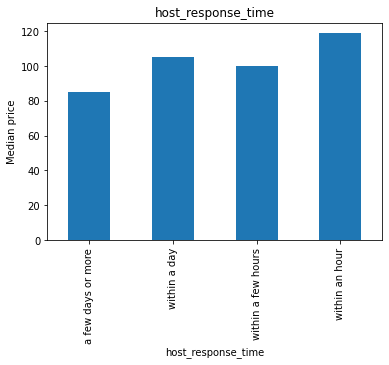

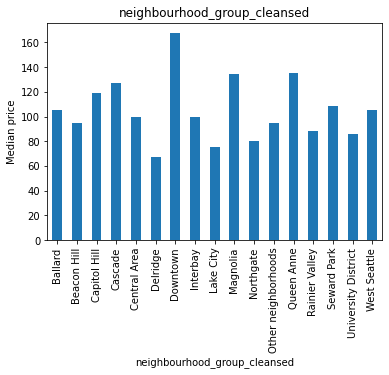

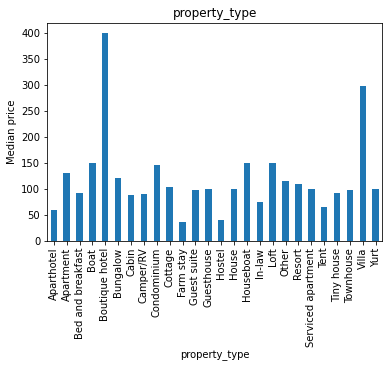

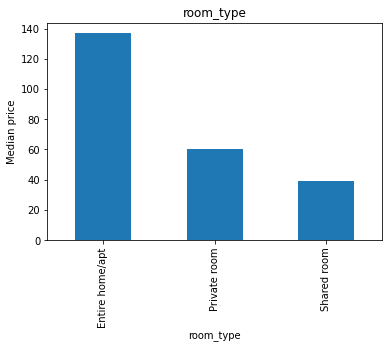

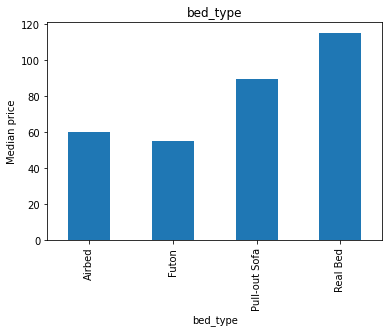

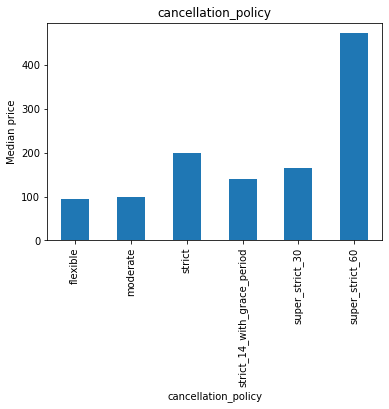

In [15]:
#Analyze the contribution of each categorical variable to the contribution of median price

def analyse_discrete(df, var):
    df = df.copy()
    df.groupby(var)['price'].median().plot.bar()
    plt.title(var)
    plt.ylabel('Median price')
    plt.show()
    
for var in cat_var:
    if var != 'amenities':
        analyse_discrete(train, var)

Observations from categorical fields:
    
    
    1. Filed 'amenities' has high cardinality and contains a high amount of text value. I can use text processing techniques to simplify this feature
    2. For other fields, I will go for label encoding as there are ordinal values present.
   

### Analyze Boolean Field

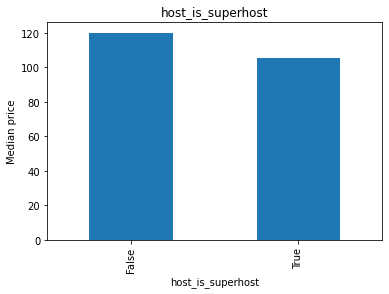

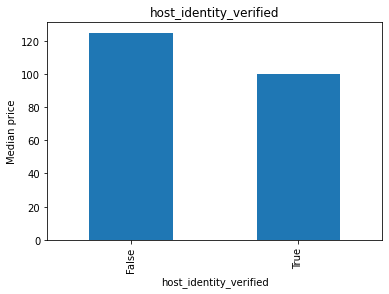

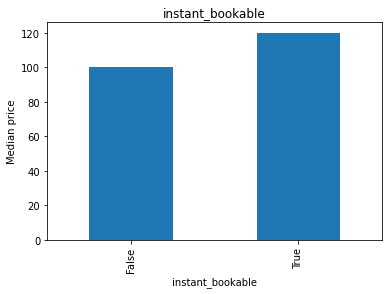

In [16]:
#Analyse the contribution of each boolian variable to the contribution of median price

for var in bool_var:
    analyse_discrete(train, var)

### Analyse Numerical Fields

In [17]:
# Getting summary for numerical fields

train[num_var].describe().T

,count,mean,std,min,25%,50%,75%,max
X1,3466.0,4.501089e+03,2.483134e+03,1.000000,2.328500e+03,4.681500e+03,6.696750e+03,8.456000e+03
id,3466.0,1.843582e+07,8.885055e+06,4291.000000,1.197427e+07,2.024816e+07,2.546066e+07,3.223951e+07
host_response_rate,3466.0,9.797721e+01,1.005783e+01,0.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
host_listings_count,3466.0,6.784882e+01,2.117434e+02,0.000000,1.000000e+00,2.000000e+00,1.075000e+01,1.596000e+03
accommodates,3466.0,3.761108e+00,2.446790e+00,1.000000,2.000000e+00,3.000000e+00,5.000000e+00,2.800000e+01
latitude,3466.0,4.762541e+01,4.509894e-02,47.496037,4.760572e+01,4.762093e+01,4.765898e+01,4.773395e+01
longitude,3466.0,-1.223340e+02,3.143808e-02,-122.419637,-1.223536e+02,-1.223326e+02,-1.223127e+02,-1.222323e+02
guests_included,3466.0,2.114541e+00,1.836108e+00,1.000000,1.000000e+00,1.000000e+00,2.000000e+00,1.600000e+01
bathrooms,3466.0,1.317802e+00,6.726338e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
bedrooms,3466.0,1.378823e+00,1.051297e+00,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,8.000000e+00


In [18]:
#Check the distinct values present in each numarical feature

for var in num_var:
    unique_count(train, var)    

X1  :  3466
id  :  3466
host_response_rate  :  32
host_listings_count  :  61
accommodates  :  19
latitude  :  3465
longitude  :  3459
guests_included  :  16
bathrooms  :  12
bedrooms  :  9
beds  :  18
cleaning_fee  :  153
minimum_nights  :  28
maximum_nights  :  92
price  :  306


From the above list, we can conclude that 'X1' and 'id' are two identification columns and they don't have prediction power. I will not select these two columns while model building.


Also, few of the numerical columns are actually encoded categorical columns. Thus, I am further segregating numerical columns into discreet and continuous columns (on basis of the criteria that number of discreet values within each feature are less than or greater than 20). 

In [19]:
# Let's make a list of discreet variables present in numerical variables:

discrete_vars = [var for var in num_var if len(train[var].unique()) < 20 ]

print(discrete_vars)

print('\nNumber of discreet variables: ', len(discrete_vars))

['accommodates', 'guests_included', 'bathrooms', 'bedrooms', 'beds']

Number of discreet variables:  5


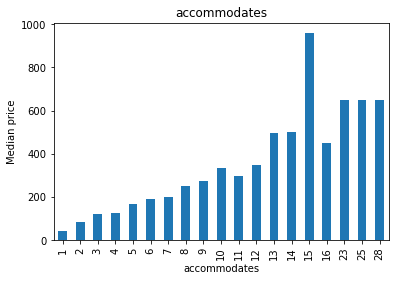

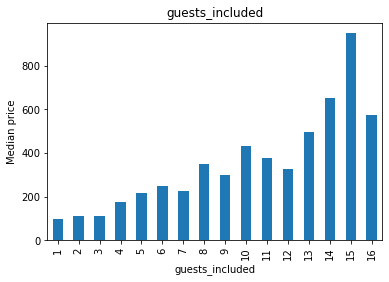

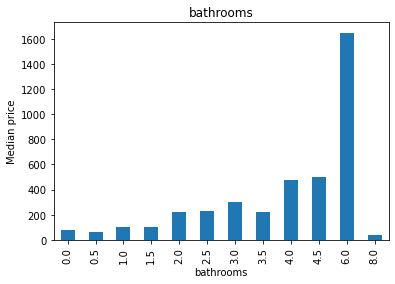

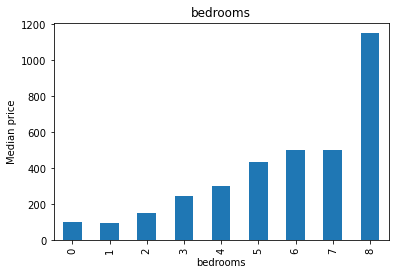

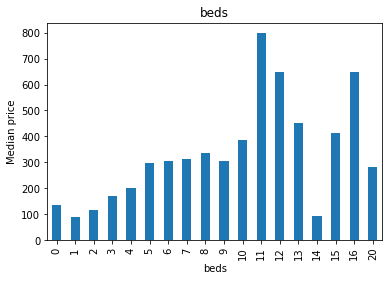

In [20]:
#Analyze the contribution of each discreet variable to the contribution of median price

for var in discrete_vars:
    analyse_discrete(train, var)

In [21]:
# Let's make a list of continuous variables present in numerical variables:

conti_vars = [var for var in num_var if len(train[var].unique()) >= 20 ]

print(conti_vars)

print('\nNumber of continuous variables: ', len(conti_vars))

['X1', 'id', 'host_response_rate', 'host_listings_count', 'latitude', 'longitude', 'cleaning_fee', 'minimum_nights', 'maximum_nights', 'price']

Number of continuous variables:  10


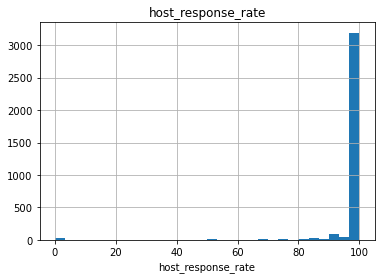

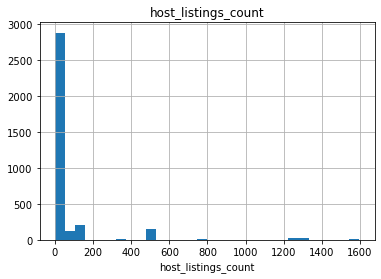

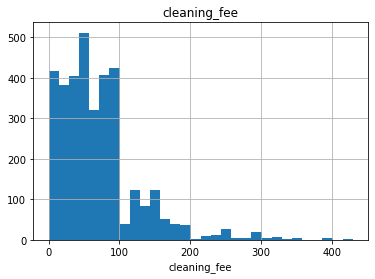

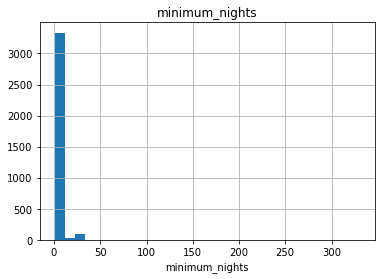

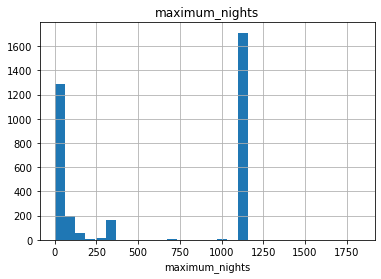

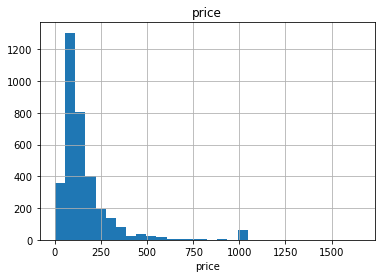

In [22]:
# Let's go ahead and analyze the distributions of these  continuous variables


def analyse_continuous(df, var):
    df = df.copy()
    df[var].hist(bins=30)
#     plt.ylabel('Number of houses')
    plt.xlabel(var)
    plt.title(var)
    plt.show()


for var in conti_vars:
    if var not in ('X1','id','latitude', 'longitude'):
        analyse_continuous(train, var)

Most of the continuous feature values seem to be skewed.  

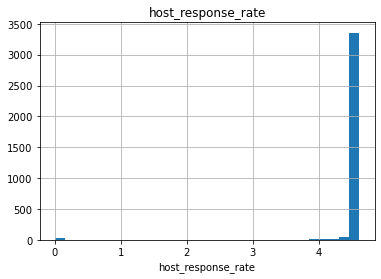

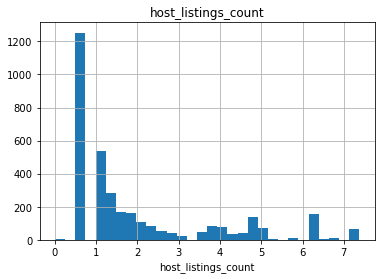

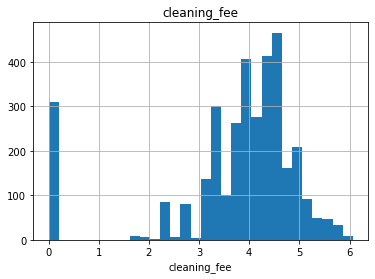

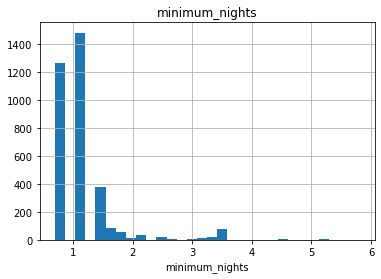

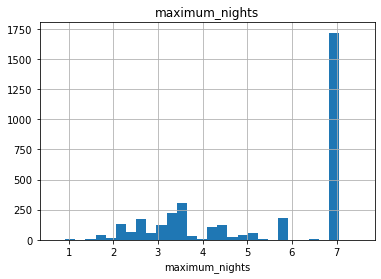

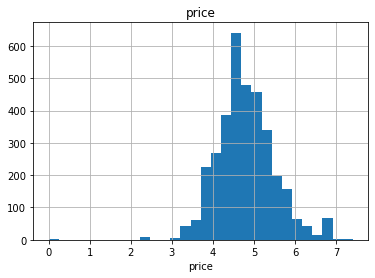

In [23]:
# Let's take a log transformation and plot the histogram as all the continuous features seem to have skewed values.

def analyse_transformed_continuous(df, var):
    df = df.copy()

#     # log does not take 0 or negative values, so let's be
#     # careful and skip those variables
#     if any(train[var] <= 0):
#         pass
#     else:
    # log transform the variable
    df[var] = np.log1p(df[var])
    df[var].hist(bins=30)
    plt.xlabel(var)
    plt.title(var)
    plt.show()


for var in conti_vars:
    if var not in ('X1','id','latitude', 'longitude'):
        analyse_transformed_continuous(train, var)

After taking log transformation, for a few variables, the distribution looks much better(close to a normal distribution). Now, let's check the outliers by using BoxPlot.

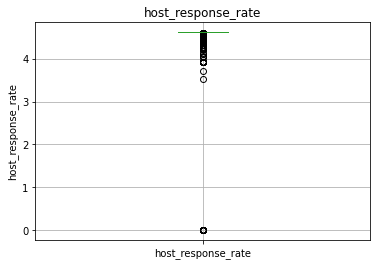

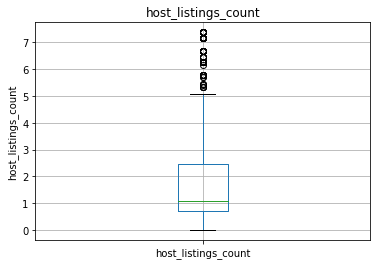

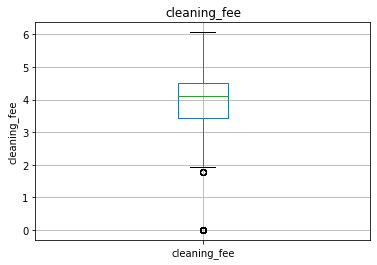

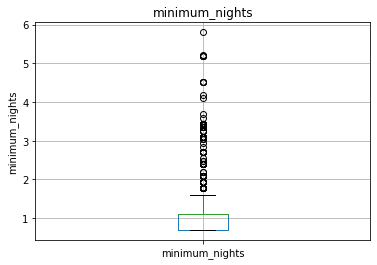

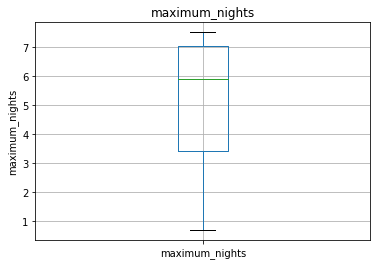

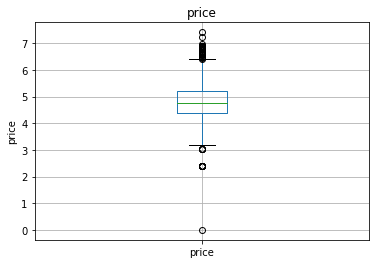

In [24]:
# let's make boxplots to visualize outliers in the continuous variables


def find_outliers(df, var):
    df = df.copy()

    # log does not take negative values, so let's be

    df[var] = np.log1p(df[var])
    df.boxplot(column=var)
    plt.title(var)
    plt.ylabel(var)
    plt.show()


for var in conti_vars:
    if var not in ('X1','id','latitude', 'longitude'):
        find_outliers(train, var)

After taking the log transformation, outliers have been handled to some extent.  

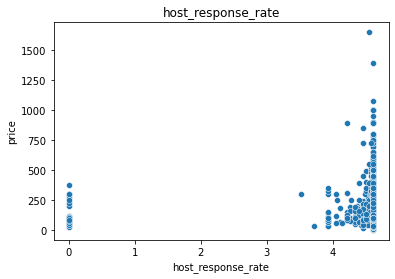

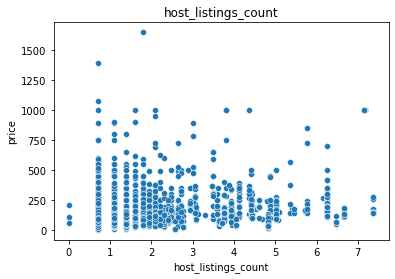

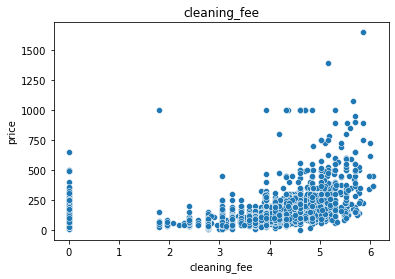

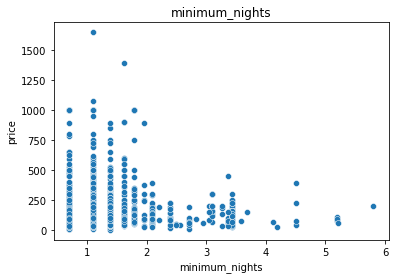

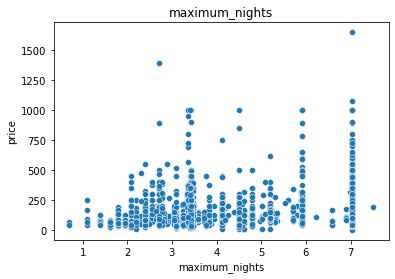

In [25]:
#Further, we will analyze the correlation between continuous variables and the target variable 'price' by plotting scatterplots. 

def conti_reln(df,var):
    df = df.copy()
    sns.scatterplot(np.log1p(df[var]),df['price'])
    plt.title(var)
    plt.show()

for var in conti_vars:
    if var not in ('price','X1','id','latitude', 'longitude'):
        conti_reln(train, var)
    

From the scatterplot, we can conclude there is no strong correlation present among continuous and target variables except cleaning_fee.
   

## Feature Engineering

### Boolean Features

In [26]:
#Encoding boolean features as True = 1 and False =0

def bool_encode(var):
    train[var] = train[var].apply(lambda x: 1 if x == True else 0)
    test[var] = test[var].apply(lambda x: 1 if x == True else 0)

for var in bool_var:
    bool_encode(var)

### Numerical Features

In [27]:
#Log Transforming Continus numerical variables:

for var in conti_vars:
    #Excluding 'X1','id','latitude', 'longitude' from log transformation as it is not required
    if var not in ('X1','id','latitude', 'longitude'): 
        train[var] = np.log1p(train[var])
        if var != 'price':
            test[var] = np.log1p(test[var])


In [28]:
#Creating a function to label encode discreet values

def discreet_encode(train,test,var):
    #creating an ordered series of discreet features how they are contributing to the target feature 'price'
    create_order = train.groupby(var)['price'].median().sort_values()
    
    #Making a dictionary to rearrange the value of each category present in discreet features
    order_map = {i : k for k,i in enumerate(create_order.index, 0)}
    
    #Mapping the new values to the existing values and replacing them in the same columns for test and train set
    train[var] = train[var].map(order_map)
    test[var]  = test[var].map(order_map)
    
for var in discrete_vars:
     discreet_encode(train,test,var)
    
    

In [29]:
#After mapping checking, if there are null values present in Test Data
test[ discrete_vars].isnull().sum()

accommodates       3
guests_included    0
bathrooms          0
bedrooms           0
beds               0
dtype: int64

In [30]:
#Replacing with mode value(1) for 3 missing vales for accommodates in test set
test['accommodates'].fillna(test['accommodates'].mode().values[0], inplace = True) 

### Categorical Features

In [31]:
#Creating label encoding with price values for categorical features
for var in cat_var:
    if var != 'amenities':
        discreet_encode(train,test,var)

In [32]:
#After mapping checking for the null in Test Data
test[ cat_var].isnull().sum()

host_response_time              0
neighbourhood_group_cleansed    0
property_type                   1
room_type                       0
bed_type                        1
amenities                       0
cancellation_policy             0
dtype: int64

In [33]:
#Replacing with mode value(19) for 1 missing vale for property_type in test set
test['property_type'].fillna(test['property_type'].mode().values[0], inplace = True) 

#Replacing with mode value(3) for 1 missing vale for bed_type in test set
test['bed_type'].fillna(test['bed_type'].mode().values[0], inplace = True) 

In [34]:
# Working with text field 'amenities'

#Downloading English Stopwords 
eng_stopwords = stopwords.words("english")

#Removing special characters from the data
train['amenities'] = train.amenities.apply(lambda x: re.sub(re.compile("[,{}\"]"), " ", x))

#Converting all charecters into lowercase
train['amenities'] = train.amenities.apply(lambda x: x.lower())


In [35]:
#Creating monograms and bigrams using TfIdf vectorizer
tf = TfidfVectorizer(ngram_range=(1, 2), lowercase=False, stop_words=eng_stopwords)

#Transfrom the client_agent field into vector
train_route = tf.fit_transform(train['amenities'])
test_route = tf.transform(test['amenities'] )

#Creating pandas dataframe out of newly created text features
train_route = pd.DataFrame(data=train_route.toarray(), columns=tf.get_feature_names())
test_route = pd.DataFrame(data=test_route.toarray(), columns=tf.get_feature_names())

#printing the shape of data frame
train_route.shape,test_route.shape


((3466, 1643), (1734, 1643))

In [36]:
#Concatenating text processed fields to the main data frame

train = pd.concat([train,train_route],axis=1)
test = pd.concat([test,test_route],axis=1)

After the model building I observed that there are three features (room_type, cleaning_fee, and bathrooms) came up as the most important feature. 
Thus, created a new feature name 'combined_imp' combining these three features.

In [37]:
#Creating new feature 'combined_imp' combining room_type, cleaning_fee, and bathrooms

train['combined_imp'] = train.cleaning_fee + train.room_type + train.bathrooms
test['combined_imp'] = test.cleaning_fee + test.room_type + test.bathrooms

In [38]:
# selecting Final features for model building

final_features = [var for var in train.columns if var not in ['price','X1','id','amenities']]

In [39]:
#Creating Independent Features
train_inde = train[final_features]

#Creating dependent features
train_dep = train['price']

#creating testf(unseen) dataframe with final features
testf = test[final_features]

In [40]:
# devide train data into traning and validation

X_train,X_val,y_train,y_val = train_test_split(train_inde,train_dep,test_size=0.25,random_state=42)

In [41]:
#Scaling the variables with StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[final_features])

#Applying StandardScaler in the traning and validation dataset

X_train[final_features] = scaler.transform(X_train[final_features])
X_val[final_features] = scaler.transform(X_val[final_features])
testf[final_features] = scaler.transform(testf[final_features])
train_inde[final_features] = scaler.transform(train_inde[final_features])


## Data Engineering

I am done with basic EDA and Feature Engineering. Also, the training dataset has been split into train and validation parts and data has been scaled using StanderdScaler.

Before we will proceed with the model building I am summarizing the following ETL steps I have taken so far:

1. 'price' and 'cleaning_fee' both are present as categorical variables. But these two fields contain currency. Thus it should be a numerical field. When I went to convert them into numerical, it was throwing errors as the field contained characters like '$',','. So, I had to remove those characters, and then I was able to convert the field into a numeric one.


2. For 'host_response_rate' also, I had to change the datatype from object to numerical. Here I had to remove '%' from the end of the string to convert it into numeric.

3. I had to change the boolean variables ['host_is_superhost', 'host_identity_verified', 'instant_bookable'] into numerical (True =1 ,False =0)


4. Field 'amenities' contains a high amount of text information. To take care of this feature, I have used NLP techniques. 
First I have removed unnecessary characters from the field and then make the filed in lowe case.
Then, I used TfIdf vectorization technique to create monograms and bigrams and then used those as features to the models.


5. I have worked on the categorical fields as well as discreet numerical features and created a dictionary of their values based on their contribution to the target variable 'price'.  I have mapped the dictionary values to categorical fields as well as discreet numerical features of the train and test dataset.


6. I have taken log transformation of continuous numerical variables as well as the target variables as most of the distribution was skewed to handle the outliers.


**PS:**
7. After the model building I observed that there are three features (room_type, cleaning_fee, and bathrooms) came up as the most important feature. 
Thus, created a new feature name 'combined_imp' combining these three features. This came up as the third important feature.

## Model Building

I am going to try three models with this dataset. 

1. First I am going to use Linear Regression. Though from observing the dataset it looks like the Linear model will not perform well.


2. Then, I will try one tree model with the bagging technique(Random Forest) and one tree model with the boosting technique(XGBoost).


Finally, we will compare their performances.

### Linear Regression

In [42]:
# Create a instance for Linear Regression model
linear_reg = LinearRegression()  

# Fit data to the model
linear_reg.fit(X_train, y_train)  

LinearRegression()

In [43]:
## Accuracy with linear regression

# Prediction with training dataset:
y_pred_LR_train = linear_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_LR_val = linear_reg.predict(X_val)

# Find training accuracy for this model:
accuracy_LR_train = r2_score(y_train, y_pred_LR_train)
print("Training Accuracy for Linear Regression Model: ", accuracy_LR_train)

# Find testing accuracy for this model:
accuracy_LR_val = r2_score(y_val, y_pred_LR_val)
# accuracy_RF_val = r2_score(np.expm1(y_val), y_pred_RF_val)
print("Testing Accuracy for Linear Regression Model: ", accuracy_LR_val)

# Find RMSE for training data:
RMSE_LR_train = sqrt(mean_squared_error(y_train, y_pred_LR_train))
print("RMSE for Training Data: ", RMSE_LR_train)

# Find RMSE for testing data:
RMSE_LR_val = sqrt(mean_squared_error(y_val, y_pred_LR_val))
print("RMSE for Testing Data: ", RMSE_LR_val)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_LR = cross_val_predict(linear_reg, train_inde, train_dep, cv=5)

# Find accuracy after 5-Fold Cross Validation
accuracy_cv_LR = r2_score(train_dep, y_pred_cv_LR)
print("Accuracy for 10-Fold Cross Predicted Linaer Regression Model: ", accuracy_cv_LR)

Training Accuracy for Linear Regression Model:  0.7457459847939225
Testing Accuracy for Linear Regression Model:  -1.0471662617002012e+27
RMSE for Training Data:  0.34835414858774444
RMSE for Testing Data:  22738288532643.06
Accuracy for 10-Fold Cross Predicted Linaer Regression Model:  -1.0081893205210068e+27


### Random Forest

In [44]:
# ## Hyperparameter tuning in Random forests


# # n_estimators = [100, 500, 1000, 1500]
# n_estimators = [1000] 
# # max_features = ['auto', 'sqrt']
# max_features = ['auto']
# max_depth = list(range(11,16))
# # max_depth.append(None)
# #min_samples_split = [2, 5, 10]
# #min_samples_leaf = [1, 2, 4, 10]


# params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
#                'max_depth': max_depth} #'min_samples_split': min_samples_split,
#                #'min_samples_leaf': min_samples_leaf}


# rf_clf = RandomForestRegressor(random_state=42)

# rf_cv = GridSearchCV(rf_clf, params_grid, cv=3, verbose=2, n_jobs=-1)


# rf_cv.fit(X_train, y_train)
# best_params = rf_cv.best_params_
# print(f"Best parameters: {best_params}")

# # Best parameters: {'max_depth': 11, 'max_features': 'auto', 'n_estimators': 1000}

In [45]:
#Declearing the Random Forest Model
RFModel = RandomForestRegressor(n_estimators=1000,max_depth=11, max_features='auto')

#Fitting values in RFModel
RFModel.fit(X_train, y_train)

RandomForestRegressor(max_depth=11, n_estimators=1000)

In [46]:
## Accuracy with Random Forest

# Prediction with training dataset:
y_pred_RF_train = np.expm1(RFModel.predict(X_train)) 

# Prediction with testing dataset:
y_pred_RF_val = np.expm1(RFModel.predict(X_val)) 

# Find training accuracy for this model:
accuracy_RF_train = r2_score(np.expm1(y_train), y_pred_RF_train)
print("Training Accuracy for Random Forest Model: ", accuracy_RF_train)

# Find testing accuracy for this model:
accuracy_RF_val = r2_score(np.expm1(y_val), y_pred_RF_val)
print("Testing Accuracy for Random Forest Model: ", accuracy_RF_val)

# Find RMSE for training data:
RMSE_RF_train = sqrt(mean_squared_error(np.expm1(y_train), y_pred_RF_train))
print("RMSE for Training Data: ", RMSE_RF_train)

# Find RMSE for testing data:
RMSE_RF_val = sqrt(mean_squared_error(np.expm1(y_val), y_pred_RF_val))
print("RMSE for Testing Data: ", RMSE_RF_val)


Training Accuracy for Random Forest Model:  0.8940045600603677
Testing Accuracy for Random Forest Model:  0.8018472440619865
RMSE for Training Data:  50.931936105950186
RMSE for Testing Data:  73.54759731269367


In [47]:
#Hyperparameter tuning for XGBoost model

#Defining a function for hyperparameter tuning

def hyperParameterTuning(X_train, y_train):
    
    param_tuning = {
#         'learning_rate': [0.01, 0.1,0.3],
        'learning_rate': [0.01],
        'max_depth': [11],
        'min_child_weight': [7,8],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [ 900],
        'reg_lambda' : [.1,.01,.05],
#         'objective': ['reg:squarederror']
    }
    

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = 'neg_mean_absolute_error', #MAE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)
    

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_
#{'max_depth': 11, 'min_child_weight': 7, 'n_estimators': 900}
# {'colsample_bytree': 0.5,
#  'learning_rate': 0.01,
#  'max_depth': 11,
#  'min_child_weight': 8,
#  'n_estimators': 900,
#  'reg_lambda': 0.01,
#  'subsample': 0.7}

In [48]:
# Calling function for hyperparameter tuning

# hyperParameterTuning(X_train, y_train)

In [49]:
#Declearing the XGBModel

XGBModel = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.5,
        learning_rate = 0.01,
        max_depth = 11,
        min_child_weight = 8,
        n_estimators = 900,
        subsample = 0.7,
        n_jobs = -1,
        reg_lambda = 0.01
        )

#Fitting values in XGBModel

XGBModel.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_val, y_val)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=11,
             min_child_weight=8, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=0.01, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
## Accuracy with XGBoost

# Prediction with training dataset:
y_pred_XGB_train = np.expm1(XGBModel.predict(X_train)) 

# Prediction with testing dataset:
y_pred_XGB_val = np.expm1(XGBModel.predict(X_val)) 

# Find training accuracy for this model:
accuracy_XGB_train = r2_score(np.expm1(y_train), y_pred_XGB_train)
print("Training Accuracy for XGB Model: ", accuracy_XGB_train)

# Find testing accuracy for this model:
accuracy_XGB_val = r2_score(np.expm1(y_val), y_pred_XGB_val)
print("Testing Accuracy for XGB Model: ", accuracy_XGB_val)

# Find RMSE for training data:
RMSE_XGB_train = sqrt(mean_squared_error(np.expm1(y_train), y_pred_XGB_train))
print("RMSE for Training Data: ", RMSE_XGB_train)

# Find RMSE for testing data:
RMSE_XGB_val = sqrt(mean_squared_error(np.expm1(y_val), y_pred_XGB_val))
print("RMSE for Testing Data: ", RMSE_XGB_val)



Training Accuracy for XGB Model:  0.9185531224105881
Testing Accuracy for XGB Model:  0.7876486573872545
RMSE for Training Data:  44.64612948249739
RMSE for Testing Data:  76.13703089544805


## Final Model Selection

While performing EDA, I observed there was hardly any linear correlation between the independent and dependent features. 
Thus as expected the Linear model fails to perform well.


Then I used two tree-based models one using bagging technique(Random Forest) and another using boosting technique(XGBoost).

As expected, both tree-based models performed well.


I am comparing the performance of both the models and will choose the best one as the final model.

In [51]:
#Comparing the performance of tree-based models on 5 fold cross-validation

for mdl in [RFModel,XGBModel]:
    start = time()
    pred = cross_val_predict(mdl, train_inde, train_dep, cv=5) 
    end = time()
    RMSE = round(sqrt(mean_squared_error(np.expm1(train_dep), np.expm1(pred))), 3)
    R2 = round(r2_score(np.expm1(train_dep), np.expm1(pred)), 3)

    print('{} -- RMSE: {} / R2 Score: {} / Latency: {}min \n\n'.format(mdl,
                                                                       RMSE,
                                                                       R2,
                                                                       round((end - start)/60, 1)))
    

RandomForestRegressor(max_depth=11, n_estimators=1000) -- RMSE: 83.06 / R2 Score: 0.726 / Latency: 25.6min 


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=11,
             min_child_weight=8, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=0.01, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None) -- RMSE: 80.618 / R2 Score: 0.742 / Latency: 2.6min 




**From the above results, we can conclude, XGBoost stands out to be the best model in this case as it is providing  better RMSE, R2 score, and Latency than Random Forest Model.**

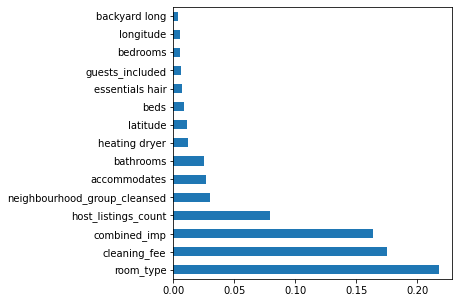

In [52]:
#Printing the 15 most important features for XGBModel

imp_feat=pd.Series(RFModel.feature_importances_,index=train_inde.columns)
plt.figure(figsize=(5,5))
imp_feat.sort_values(ascending = False)[:15].plot(kind='barh')
plt.show()


**Conclusions:**

From the final model we can draw the following conclusions on the pricing of Seattle Airbnb listings:

1. The price of the  Airbnb listings primarily depends on the Type of Rooms(Entire home/apt, Private Room, or Shared room). It is always expensive for an Entire home/ap.


2. Cleaning Fee is 2nd most important feature for pricing. We have also observed during EDA if cleaning_fee increases the pricing generally increases.


3. The pricing also significantly depends on few other factors: 
        host_listings_count
        neighbourhood_group_cleansed
        accommodates 
        bathrooms
        beds
        guests_included 
        bedrooms
        locality(latitude, longitude)
        
        
4. It has also been observed that listing with the following amenities has a major contribution in determining the price:
        Heating
        Dryer
        Essentials
        Hair dryer
        Garden or backyard
        

## Final Predictions

In [53]:
#Convering result into new dataframe

result = pd.DataFrame()
result['id'] = test.id

#taking prediction for test set using XGBModel
result['price']= np.expm1(XGBModel.predict(testf)) 

#Final Result
result.head(5)

,id,price
0,392779,117.260422
1,12456183,82.449608
2,1851863,120.342415
3,23309878,140.297577
4,10768347,53.224216


In [55]:
# Exporting result to CSV

result.to_csv('model-predicted.xlsx',index=False)

In [56]:
test.shape

(1734, 1668)

In [57]:
result.shape

(1734, 2)